## Data from Owid. ##

CO2 Data: https://github.com/owid/co2-data/blob/master/README.md

Energy Data: https://github.com/owid/energy-data/blob/master/README.md

International Enegergy data - U.S. Energy Information Administration

CO2 Data - Global Carbon Project, National fossil carbon emissions

GDP - University of Groningen GGDC's Maddison Project Database, Bolt and van Zanden, 2024

## EDA

### Necessary imports & Data import

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading data
df_co2 = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

print(f"The shape of the dataset: {df_co2.shape}")
df_co2.sample(5)

The shape of the dataset: (50191, 79)


country  year iso_code  population           gdp  cement_co2  \
24064        Kazakhstan  2003      KAZ  15747379.0  1.975841e+11       0.001   
41051         Singapore  1884      SGP    128516.0           NaN       0.000   
46086      Turkmenistan  1882      TKM    646077.0           NaN         NaN   
36642  Papua New Guinea  1954      PNG   1693505.0           NaN       0.000   
42354     South America  1870      NaN  23934719.0           NaN       0.000   

       cement_co2_per_capita      co2  co2_growth_abs  co2_growth_prct  ...  \
24064                    0.0  175.855          18.330           11.636  ...   
41051                    0.0      NaN             NaN              NaN  ...   
46086                    NaN    0.132           0.007            5.331  ...   
36642                    0.0    0.095           0.000            0.000  ...   
42354                    0.0    2.135           0.047            2.250  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
24064                   1.639                                 0.925   
41051                     NaN                                 0.007   
46086                     NaN                                 0.090   
36642                     NaN                                 0.130   
42354                     NaN                                 5.461   

       temperature_change_from_ch4  temperature_change_from_co2  \
24064                        0.003                        0.008   
41051                        0.000                        0.000   
46086                        0.000                        0.000   
36642                        0.000                        0.001   
42354                        0.001                        0.002   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
24064                        0.011                          0.0    194.386   
41051                        0.000                          0.0      0.208   
46086                        0.000                          0.0      4.981   
36642                        0.001                          0.0     13.749   
42354                        0.002                          0.0    216.174   

       total_ghg_excluding_lucf  trade_co2  trade_co2_share  
24064                   206.844     -51.29          -29.166  
41051                     0.045        NaN              NaN  
46086                     0.443        NaN              NaN  
36642                     0.535        NaN              NaN  
42354                    11.342        NaN              NaN  

[5 rows x 79 columns]

### Simple data exploration

In [3]:
print(f"Number of rows: {df_co2.shape[0]}")
print(f"Number of columns: {df_co2.shape[1]}")
print(f"Year range ({df_co2['year'].min()}, {df_co2['year'].max()})")
print(f"Number of unique countries: {df_co2['country'].nunique()}")

Number of rows: 50191
Number of columns: 79
Year range (1750, 2023)
Number of unique countries: 255


In [4]:
# Column information
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [5]:
# Stats
numer_cols = ['co2', 'co2_per_capita', 'co2_per_gdp', 'gdp', 'population', 
                  'primary_energy_consumption']
df_co2[numer_cols].describe().T

count          mean           std         min  \
co2                         29137.0  4.156982e+02  1.945844e+03         0.0   
co2_per_capita              26182.0  3.815391e+00  1.438345e+01         0.0   
co2_per_gdp                 17528.0  3.976209e-01  7.537833e-01         0.0   
gdp                         15251.0  3.300495e+11  3.086383e+12  49980000.0   
population                  41019.0  5.686141e+07  3.199905e+08       215.0   
primary_energy_consumption  10151.0  2.492937e+03  1.125748e+04         0.0   

                                     25%           50%           75%  \
co2                         3.740000e-01  4.990000e+00  5.327300e+01   
co2_per_capita              1.690000e-01  1.013000e+00  4.296750e+00   
co2_per_gdp                 1.310000e-01  2.635000e-01  5.080000e-01   
gdp                         7.874038e+09  2.743861e+10  1.212627e+11   
population                  3.273130e+05  2.289522e+06  9.862459e+06   
primary_energy_consumption  7.586500e+00  6.764100e+01  4.685280e+02   

                                     max  
co2                         3.779157e+04  
co2_per_capita              7.826820e+02  
co2_per_gdp                 8.257600e+01  
gdp                         1.301126e+14  
population                  8.091735e+09  
primary_energy_consumption  1.721191e+05

### G20 countries

In [6]:
g20_countries = [
    'United States', 'China', 'Japan', 'Germany', 
    'United Kingdom', 'France', 'Italy', 'Canada',
    'Brazil', 'Russia', 'India', 'Australia', 
    'Mexico', 'Indonesia', 'Turkey', 'Saudi Arabia',
    'South Africa', 'Argentina', 'South Korea', 'Europe'
]

# Filter G20 countries
g20_df = df_co2[df_co2['country'].isin(g20_countries)].copy()

# Check numer_columns exist
existing_num_cols = [col for col in numer_cols if col in df_co2.columns]

g20_coverage = pd.DataFrame({
    'Country': g20_countries,
    'Existence': [country in g20_df['country'].unique() for country in g20_countries],
    'First Year': [g20_df[g20_df['country'] == country]['year'].min() if country in g20_df['country'].unique() else None for country in g20_countries],
    'Last Year': [g20_df[g20_df['country'] == country]['year'].max() if country in g20_df['country'].unique() else None for country in g20_countries],
    'Total Years': [g20_df[g20_df['country'] == country]['year'].nunique() if country in g20_df['country'].unique() else 0 for country in g20_countries]
})

print("G20 Countries Data Coverage:")
display(g20_coverage.sort_values('First Year'))

G20 Countries Data Coverage:


Country  Existence  First Year  Last Year  Total Years
4   United Kingdom       True        1750       2023          274
11       Australia       True        1750       2023          274
19          Europe       True        1750       2023          274
7           Canada       True        1785       2023          239
3          Germany       True        1792       2023          232
0    United States       True        1800       2023          224
5           France       True        1802       2023          216
9           Russia       True        1830       2023          178
6            Italy       True        1850       2023          174
2            Japan       True        1850       2023          174
8           Brazil       True        1850       2023          174
10           India       True        1850       2023          174
12          Mexico       True        1850       2023          174
13       Indonesia       True        1850       2023          174
14          Turkey       True        1850       2023          174
1            China       True        1850       2023          174
15    Saudi Arabia       True        1850       2023          174
16    South Africa       True        1850       2023          174
17       Argentina       True        1850       2023          174
18     South Korea       True        1850       2023          174

In [7]:
# Missing values for G20
missing_values = g20_df[existing_num_cols].isnull().sum()
missing_percentage = (g20_df[existing_num_cols].isnull().sum() / len(g20_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values})
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

Missing Values
primary_energy_consumption            2839
gdp                                   1267
co2_per_gdp                           1130
co2_per_capita                         518
co2                                    361
population                             155

In [8]:
# Colormap for each countries
color_map = plt.cm.get_cmap('tab20', len(g20_countries))
colors = {country: color_map(i) for i, country in enumerate(g20_countries) if country in g20_df['country'].unique()}

# Subplots for each numerical variable
fig, axes = plt.subplots(len(existing_num_cols), 1, figsize=(16, 5*len(existing_num_cols)))
if len(existing_num_cols) == 1:
    axes = [axes]

for i, col in enumerate(existing_num_cols):
    ax = axes[i]
    
    for country in g20_countries:
        country_data = g20_df[g20_df['country'] == country].sort_values('year')
        
        if not country_data.empty and col in country_data.columns and country_data[col].notna().any():
            ax.plot(country_data['year'], country_data[col], label=country, linewidth=2, alpha=0.8, color=colors[country])
    
    # Title and labels
    ax.set_title(f'{col.replace("_", " ").title()} for G20 countries')
    ax.set_xlabel('Year')
    ax.set_ylabel(col.replace('_', ' ').title())
    ax.grid(True, alpha=0.3)

# Legend
handles, labels = [], []
for country in g20_countries:
    if g20_df[g20_df['country'] == country].shape[0] > 0:
        handles.append(plt.Line2D([0], [0], color=colors[country], lw=2))
        labels.append(country)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, frameon=True, fontsize=10)

plt.tight_layout()
plt.show()

### CO2 share for G20 countries

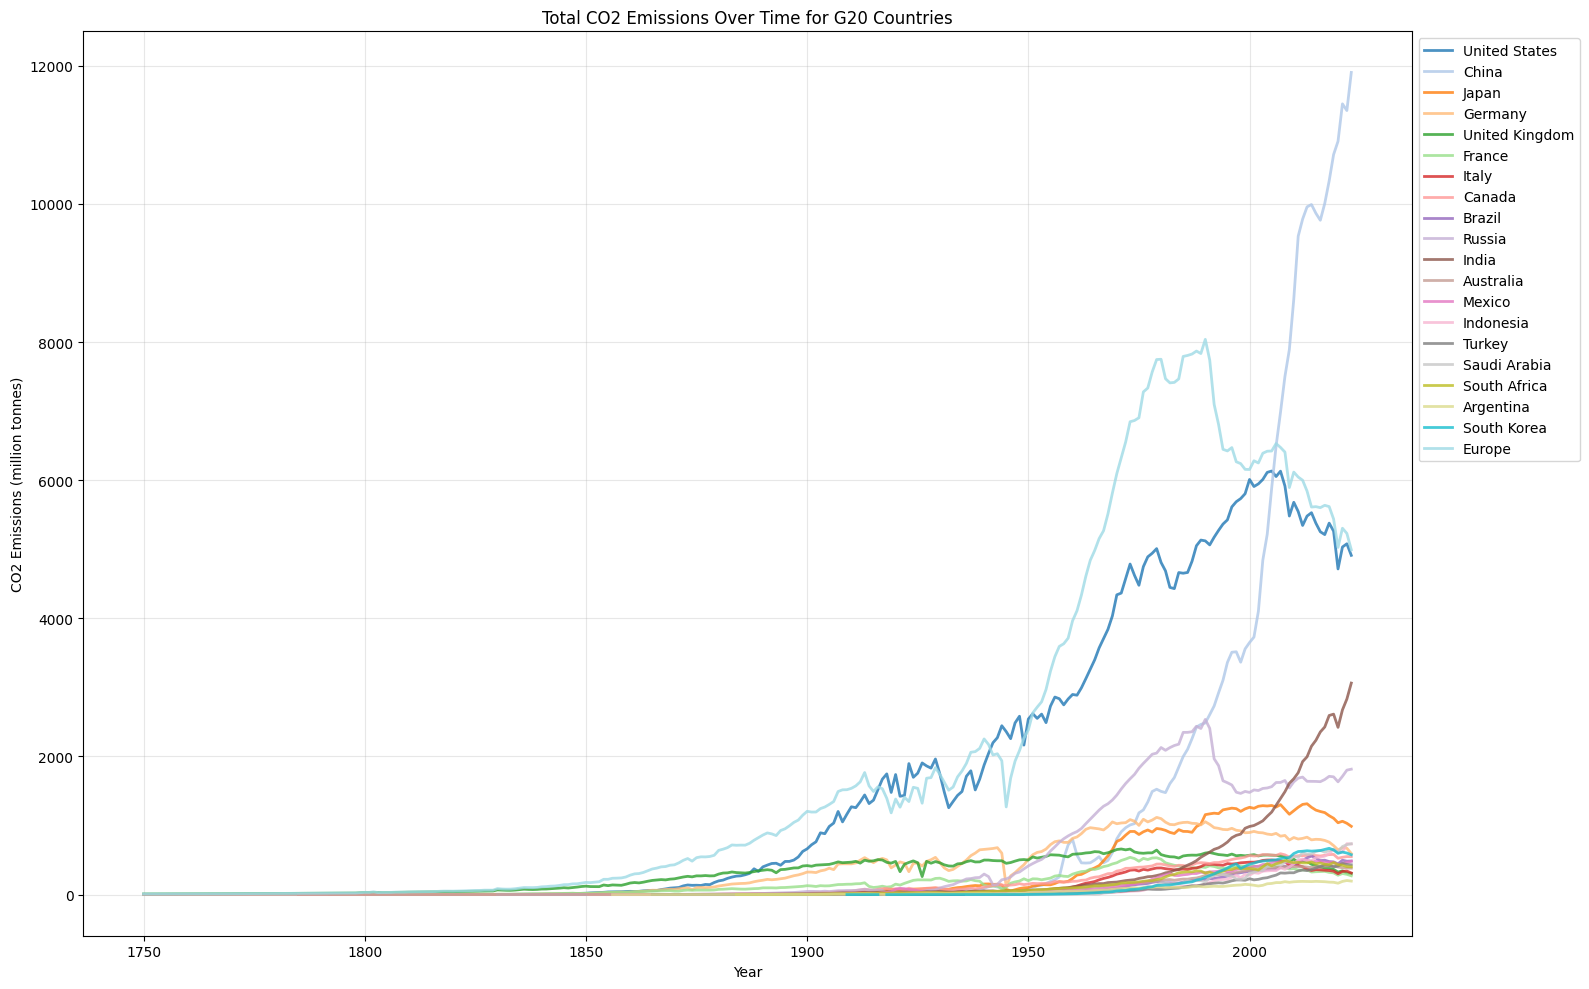

In [9]:
# Figsize
plt.figure(figsize=(16, 10))

# Colormap
for country, color in colors.items():
    country_data = g20_df[g20_df['country'] == country].sort_values('year')
    if not country_data.empty and 'co2' in country_data.columns:
        plt.plot(country_data['year'], country_data['co2'], label=country, linewidth=2, alpha=0.8, color=color)

plt.title('Total CO2 Emissions Over Time for G20 Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
# Stackplot with a line plot needs to be Europe excluded since double-counting makes error with the lineplot.
g20_countries = [
    'United States', 'China', 'Japan', 'Germany', 
    'United Kingdom', 'France', 'Italy', 'Canada',
    'Brazil', 'Russia', 'India', 'Australia', 
    'Mexico', 'Indonesia', 'Turkey', 'Saudi Arabia',
    'South Africa', 'Argentina', 'South Korea', 'Europe'
]

# Filter G20 countries
g20_df = df_co2[df_co2['country'].isin(g20_countries)].copy()

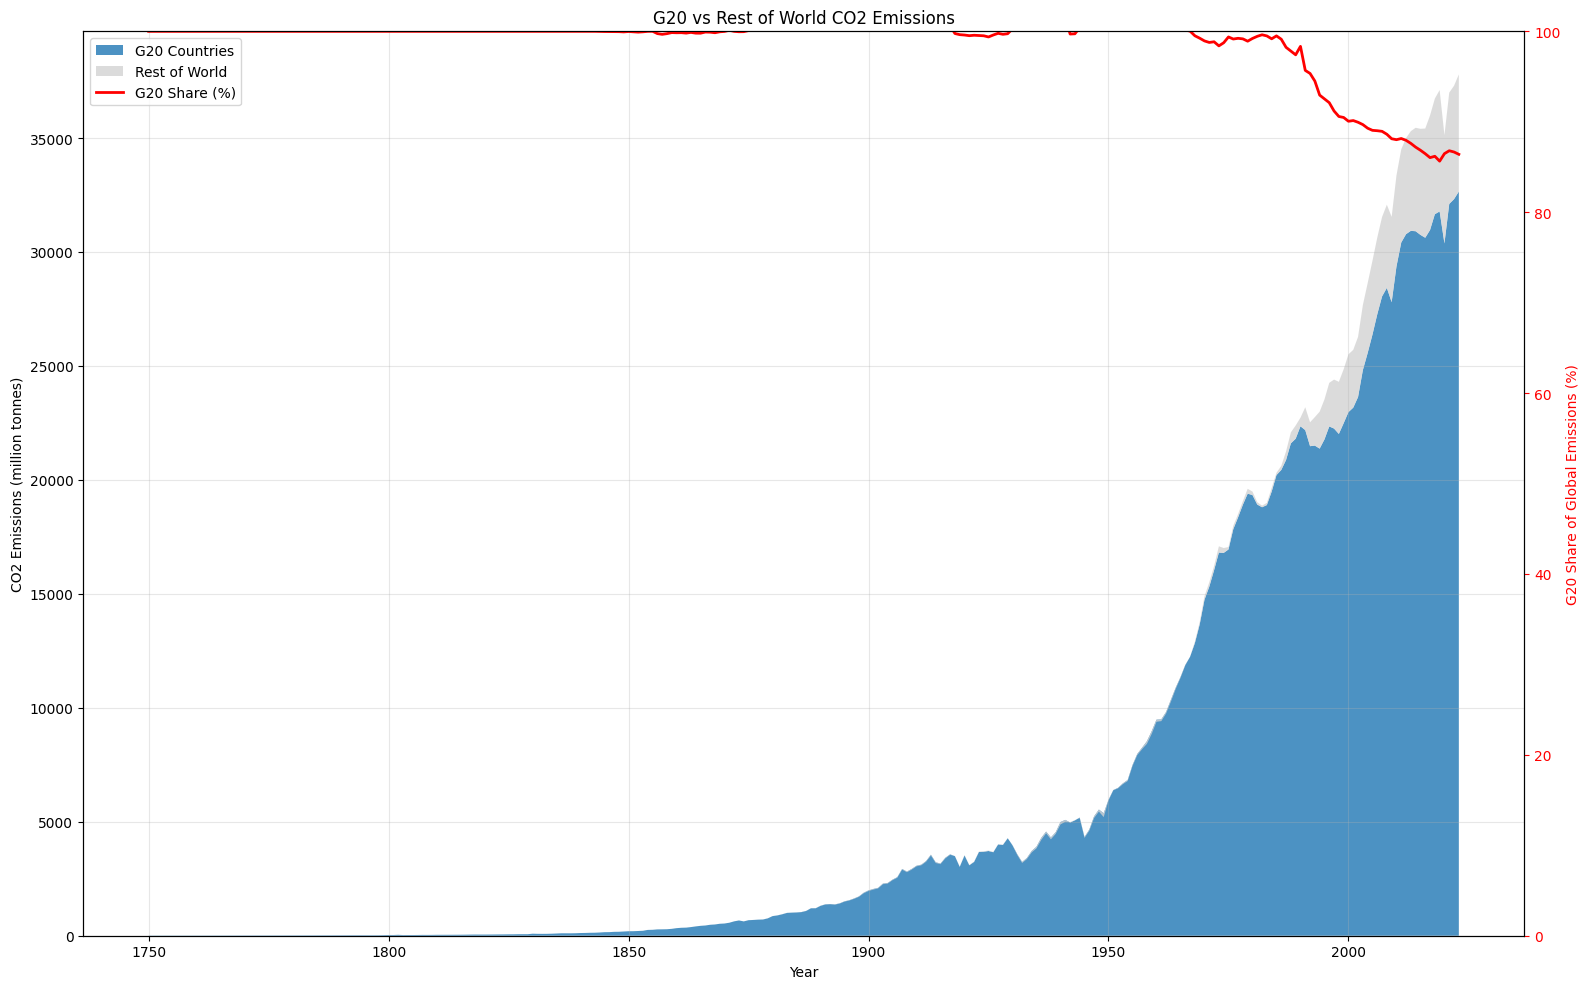

In [11]:
# Stacked area chart for G20 share of co2
plt.figure(figsize=(16, 10))

world_data = df_co2[df_co2['country'] == 'World'].sort_values('year')
world_co2 = world_data[['year', 'co2']].set_index('year')

# Double-counted European G20 countries
euro_g20_countries = ['Germany', 'United Kingdom', 'France', 'Italy']

europe_data = df_co2[df_co2['country'] == 'Europe'].sort_values('year')
europe_co2 = europe_data[['year', 'co2']].set_index('year') if not europe_data.empty else pd.DataFrame()

# European G20 countries for deduplication
euro_g20_df = df_co2[df_co2['country'].isin(euro_g20_countries)].copy()
euro_g20_by_year = euro_g20_df.groupby('year')['co2'].sum().to_frame() if not euro_g20_df.empty else pd.DataFrame()

# Exclude Double-counted European countries
non_euro_g20_df = df_co2[df_co2['country'].isin([c for c in g20_countries if c not in euro_g20_countries and c != 'Europe'])].copy()
non_euro_g20_by_year = non_euro_g20_df.groupby('year')['co2'].sum().to_frame()

# Combine with Europe data
g20_by_year = pd.DataFrame()
if not europe_co2.empty and not non_euro_g20_by_year.empty:
    temp_combined = non_euro_g20_by_year.join(europe_co2, how='outer', rsuffix='_europe')
    temp_combined = temp_combined.fillna(0)

    # Total G20: non-European G20 + Europe
    g20_by_year['co2'] = temp_combined['co2'] + temp_combined['co2_europe']

combined = world_co2.join(g20_by_year, lsuffix='_world', rsuffix='_g20')
combined['non_g20'] = combined['co2_world'] - combined['co2_g20']
combined['g20_percent'] = (combined['co2_g20'] / combined['co2_world']) * 100

# Stackplot
plt.stackplot(combined.index, combined['co2_g20'], combined['non_g20'],
             labels=['G20 Countries', 'Rest of World'],
             colors=['#1f77b4', '#d3d3d3'], alpha=0.8)

# Primary y-axis for emissions
ax1 = plt.gca()
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (million tonnes)')
ax1.grid(True, alpha=0.3)

# Secondary y-axis for percentage
ax2 = ax1.twinx()
ax2.plot(combined.index, combined['g20_percent'], 'r-', linewidth=2, label='G20 Share (%)')
ax2.set_ylabel('G20 Share of Global Emissions (%)', color='r')
ax2.tick_params(axis='y', colors='r')
ax2.set_ylim(0, 100)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('G20 vs Rest of World CO2 Emissions')
plt.tight_layout()
plt.show()

### Carbon intensity (CO2 per GDP)

In [12]:
# From year 1950 due to some of the missing values of previous years
g20_CI_df = g20_df[g20_df['year'] >= 1950].copy()

# Verify all the g20 countries have data from 1950
available_countries = g20_CI_df['country'].unique()
print(f"Available countries in dataset: {len(available_countries)}")
for country in g20_countries:
    if country not in available_countries:
        print(f"Missing data for: {country}")

Available countries in dataset: 20


In [13]:
# earlier year instead of 1950
countries_with_data = []
reference_values = {}
earliest_years = {}

for country in g20_countries:
    country_data = g20_df[g20_df['country'] == country].sort_values('year')
    
    if country_data.empty or 'co2_per_gdp' not in country_data.columns:
        print(f"No data available for {country}")
        continue
    
    # Earliest year with valid  CI data
    valid_data = country_data[country_data['co2_per_gdp'].notna()]
    if valid_data.empty:
        print(f"No valid co2_per_gdp data for {country}")
        continue
    
    earliest_year = valid_data['year'].min()
    earliest_value = valid_data[valid_data['year'] == earliest_year]['co2_per_gdp'].values[0]
    
    if pd.notna(earliest_value) and earliest_value > 0:
        countries_with_data.append(country)
        reference_values[country] = earliest_value
        earliest_years[country] = earliest_year
        print(f"{country}: Reference year {earliest_year}")

United States: Reference year 1820
China: Reference year 1911
Germany: Reference year 1820
United Kingdom: Reference year 1820
France: Reference year 1820
Canada: Reference year 1820
Brazil: Reference year 1870
Russia: Reference year 1950
India: Reference year 1861
Australia: Reference year 1820
Mexico: Reference year 1870
Turkey: Reference year 1870
Saudi Arabia: Reference year 1950
South Africa: Reference year 1950
Argentina: Reference year 1870
South Korea: Reference year 1911
Europe: Reference year 1820


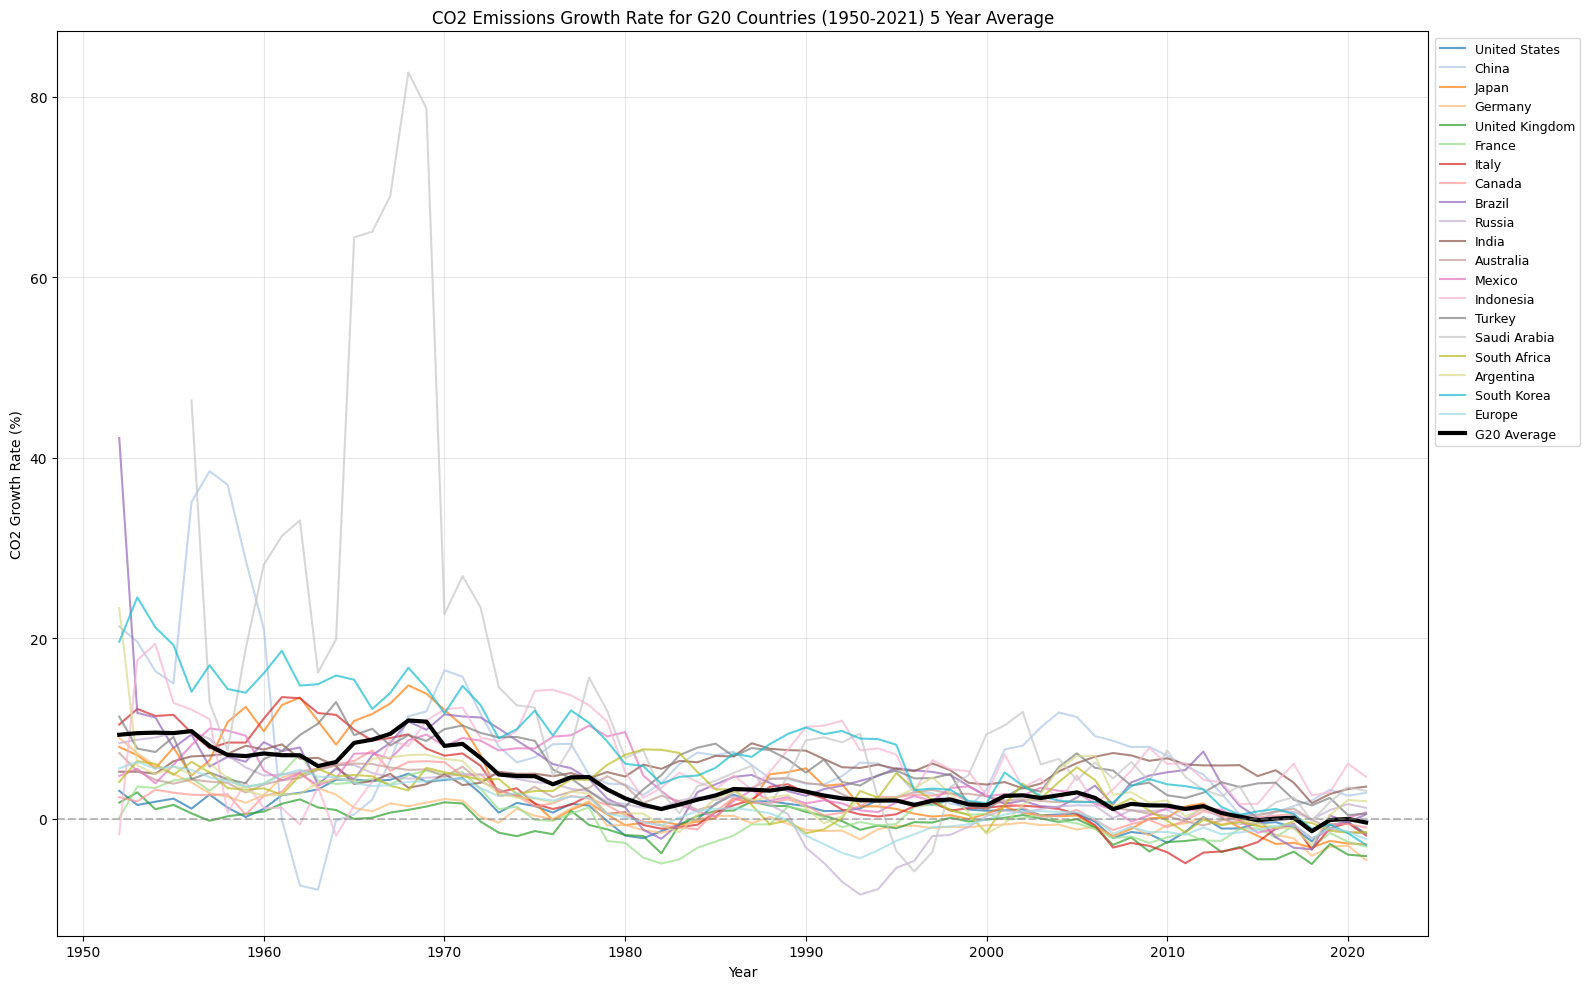

In [14]:
# Color map
color_map = plt.cm.get_cmap('tab20', len(g20_countries) + 1)
country_colors = {country: color_map(i) for i, country in enumerate(g20_countries)}
country_colors['G20 Average'] = 'black'

# Filter data from 1950
g20_co2_growth = g20_df[(g20_df['year'] >= 1950)].copy()

# Figure
plt.figure(figsize=(16, 10))

# Dataframes for each country for the averages
country_dfs = {}
for country in g20_countries:
    country_data = g20_co2_growth[g20_co2_growth['country'] == country].copy()

    if not country_data.empty and 'co2_growth_prct' in country_data.columns:
        country_data = country_data.sort_values('year')

        if len(country_data) > 5:
            country_data['smooth_growth'] = country_data['co2_growth_prct'].rolling(window=5, center=True).mean()
            country_dfs[country] = country_data

# CO2 growth for each country
for country, data in country_dfs.items():
    plt.plot(data['year'], data['smooth_growth'], label=country, color=country_colors[country], linewidth=1.5, alpha=0.7)

# G20 average
yearly_data = g20_co2_growth.groupby('year')['co2_growth_prct'].mean().reset_index()
yearly_data = yearly_data.sort_values('year')

if len(yearly_data) > 5:
    yearly_data['smooth_growth'] = yearly_data['co2_growth_prct'].rolling(window=5, center=True).mean()
    plt.plot(yearly_data['year'], yearly_data['smooth_growth'], label='G20 Average', color='black', linewidth=3)

# Options
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.title('CO2 Emissions Growth Rate for G20 Countries (1950-2021) 5 Year Average')
plt.xlabel('Year')
plt.ylabel('CO2 Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Color map
color_map = plt.cm.get_cmap('tab20', len(g20_countries) + 1)
country_colors = {country: color_map(i) for i, country in enumerate(g20_countries)}
country_colors['G20 Average'] = 'black'

# Filter data from 1950
g20_intensity = g20_df[(g20_df['year'] >= 1950)].copy()

# Figure
plt.figure(figsize=(16, 10))

# Individual G20 countries
for country in g20_countries:
    country_data = g20_intensity[g20_intensity['country'] == country]

    if not country_data.empty and 'co2_per_gdp' in country_data.columns:
        country_data = country_data.sort_values('year')

        if country_data['co2_per_gdp'].notna().any():
            plt.plot(country_data['year'], country_data['co2_per_gdp'],
                    label=country, color=country_colors.get(country, 'gray'),
                    linewidth=1.5, alpha=0.7)
    
# G20 average
g20_intensity_avg = g20_intensity.groupby('year')['co2_per_gdp'].mean().reset_index()

plt.plot(g20_intensity_avg['year'], g20_intensity_avg[['co2_per_gdp']],
         label='G20 Average', color='black',
         linewidth=3, alpha=1.0, linestyle='-')

# Options of the plot
plt.title('Carbon Intensity for G20 Countries (1950-)')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (kg/$)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

#plt.savefig('Intensity_G20.png')
plt.tight_layout()
plt.show()


### CO2 Growth Rate vs CI Rate 10-year rolling

In [70]:
import plotly.graph_objects as go

periods = [(1960, 1964), (1965, 1969), (1970, 1974), (1975, 1979), (1980, 1984), (1985, 1989),
           (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019), (2020, 2023)]

period_results = []

for start_year, end_year in periods:
    period_data = g20_df[(g20_df['year'] >= start_year) & (g20_df['year'] <= end_year)].copy()

    for country in g20_countries:
        country_data = period_data[period_data['country'] == country].sort_values('year')

        #years = country_data.iloc[-1]['year'] - country_data.iloc[0]['year']

        co2_growth_rate = country_data['co2_growth_prct'].mean()

        annual_intensity_change = country_data['co2_per_gdp'].pct_change() * 100
        carbon_intensity_rate = annual_intensity_change.mean()
                    
        period_results.append({
            'country': country,
            'period': f"{start_year}-{end_year}",
            'co2_growth_rate': co2_growth_rate,
            'carbon_intensity_rate': carbon_intensity_rate
        })

results_df = pd.DataFrame(period_results).dropna()

In [73]:
sa = g20_df[(g20_df['country'] == 'Saudi Arabia') & (g20_df['year'] >= 1965) & (g20_df['year'] <= 1969)]
sa['co2_growth_prct'].mean()

np.float64(68.9992)

In [76]:
sa['co2_per_gdp'].pct_change().mean()

np.float64(0.7902644761240206)

In [80]:
fig = go.Figure()

# Frames
frames = []
for period_label in results_df['period'].unique():
    period_df = results_df[results_df['period'] == period_label]

    frame = go.Frame(data=[go.Scatter(x=period_df['co2_growth_rate'],
                                      y=period_df['carbon_intensity_rate'],
                                      mode='markers+text',
                                      marker=dict(size=10, opacity=0.7),
                                      text=period_df['country'],
                                      textposition="top center",
                                      textfont=dict(size=10),
                                      name=period_label)],
                     name=period_label
                     )
    frames.append(frame)

# Base plot
first_period = results_df['period'].unique()[0]
first_df = results_df[results_df['period'] == first_period]

fig.add_trace(go.Scatter(x=first_df['co2_growth_rate'],
                         y=first_df['carbon_intensity_rate'],
                         mode='markers+text',
                         marker=dict(size=10, opacity=0.7),
                         text=first_df['country'],
                         textposition="top center",
                         textfont=dict(size=10),
                         name=first_period
                         ))

# Frames to Figure
fig.frames = frames

# Slider
sliders = [{
    'steps': [{
                'method': 'animate',
                'args' : [[period], {
                'frame': {'duration': 500, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300}
                }],
                'label': period
        } for period in results_df['period'].unique()
    ],
    'active': 0,
    'currentvalue': {"prefix": "Period: "},
    'pad': {"t": 50}
}]

# Layout
fig.update_layout(
    title='Change in Rates CO2 Growth vs Carbon Intensity for G20 countries (5-Year Rolling)',
    xaxis=dict(
        title='CO2 Growth Rate (%)',
        range=[-10, 75],
        zeroline=True,
        zerolinewidth=2,
    ),
    yaxis=dict(
        title='Carbon Intensity Rate (%)',
        range=[-30, 85],
        zeroline=True,
        zerolinewidth=2,
    ),
    sliders=sliders,
    width=900,
    height=700
)

# Play
fig.update_layout(
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 500}
            }]
        }],
        'x': 0.1,
        'y': 0
    }]
)

fig.show()

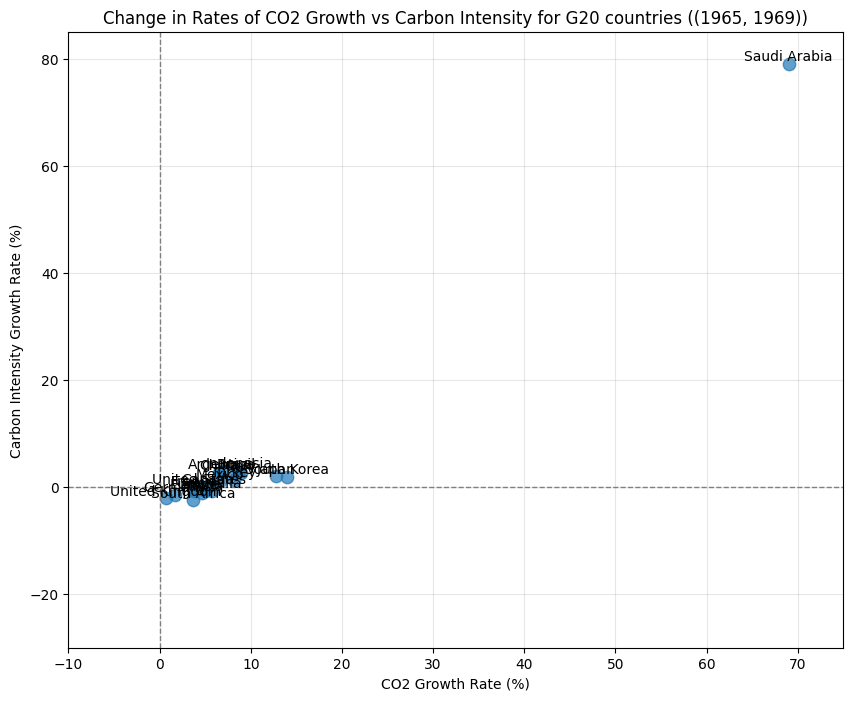

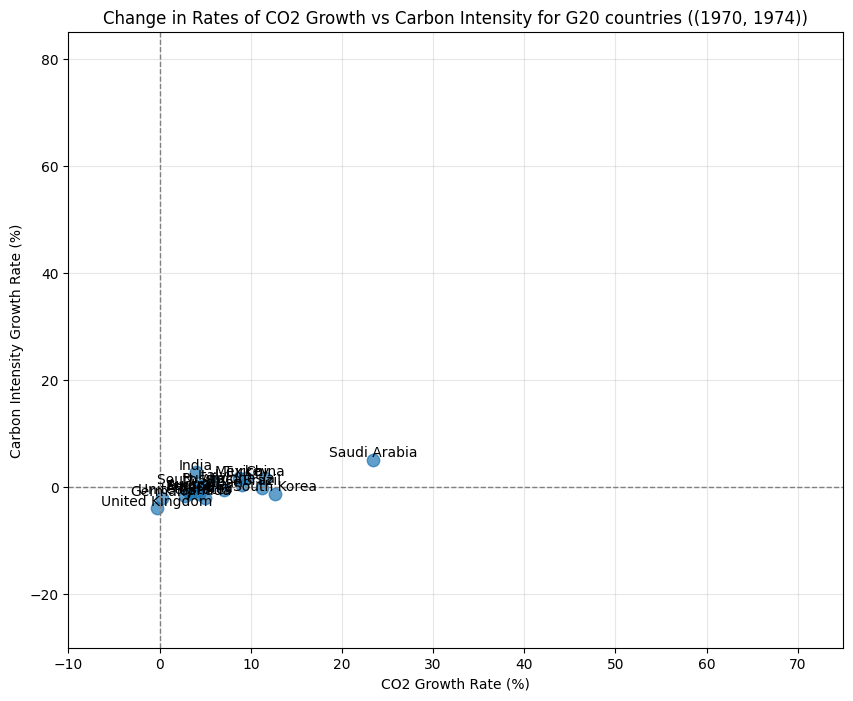

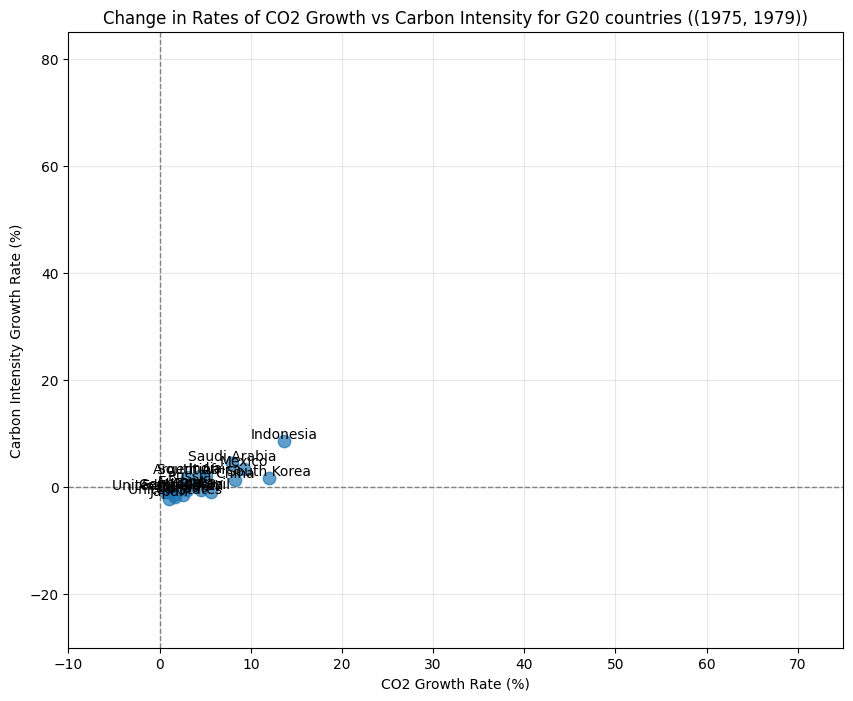

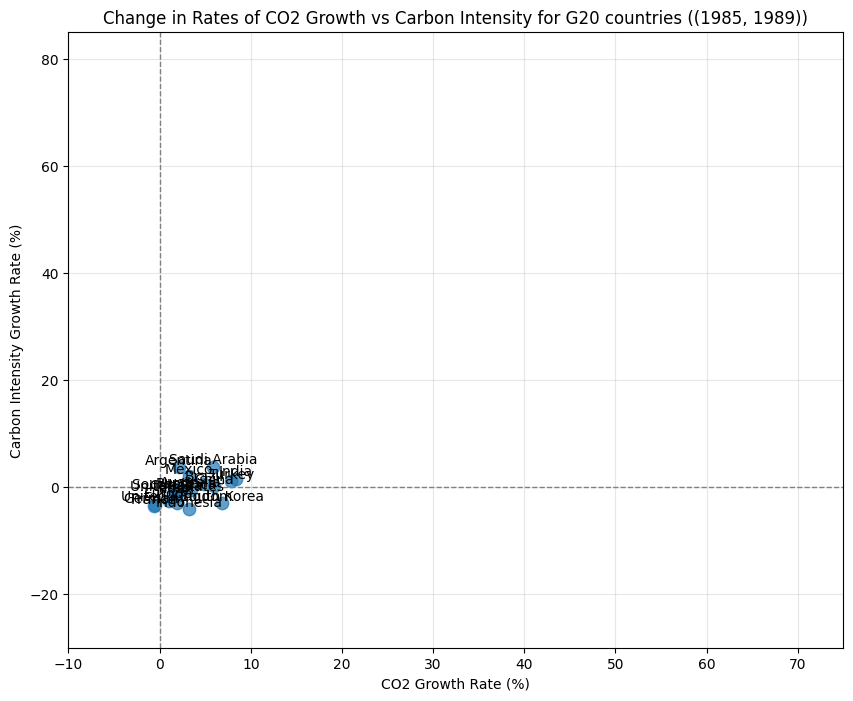

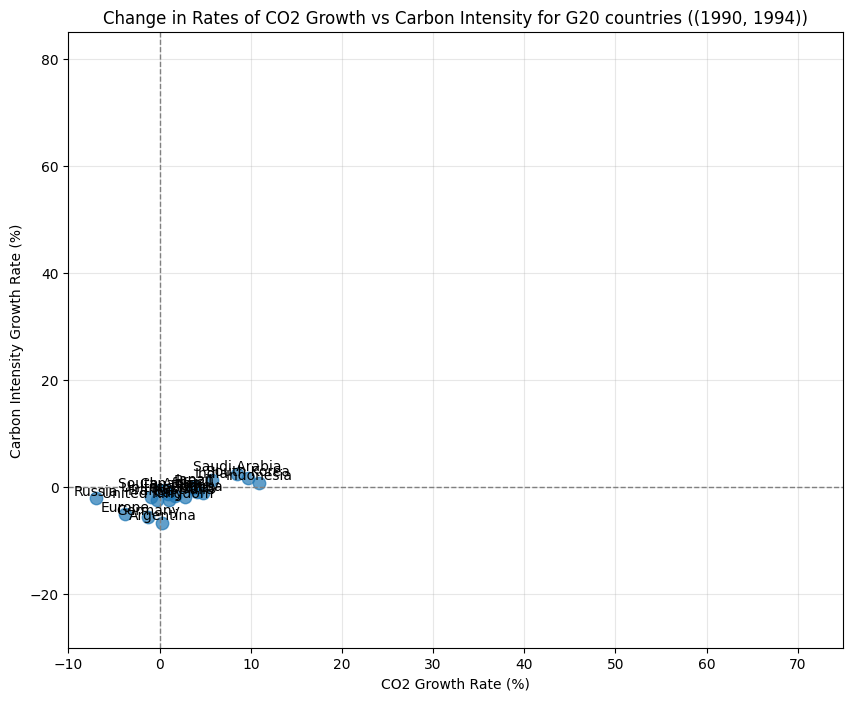

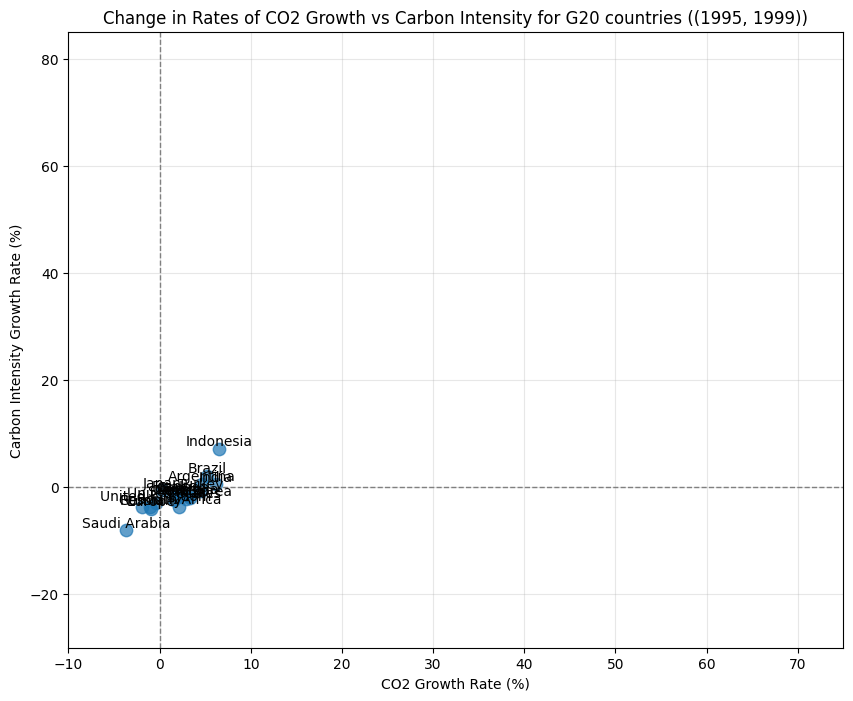

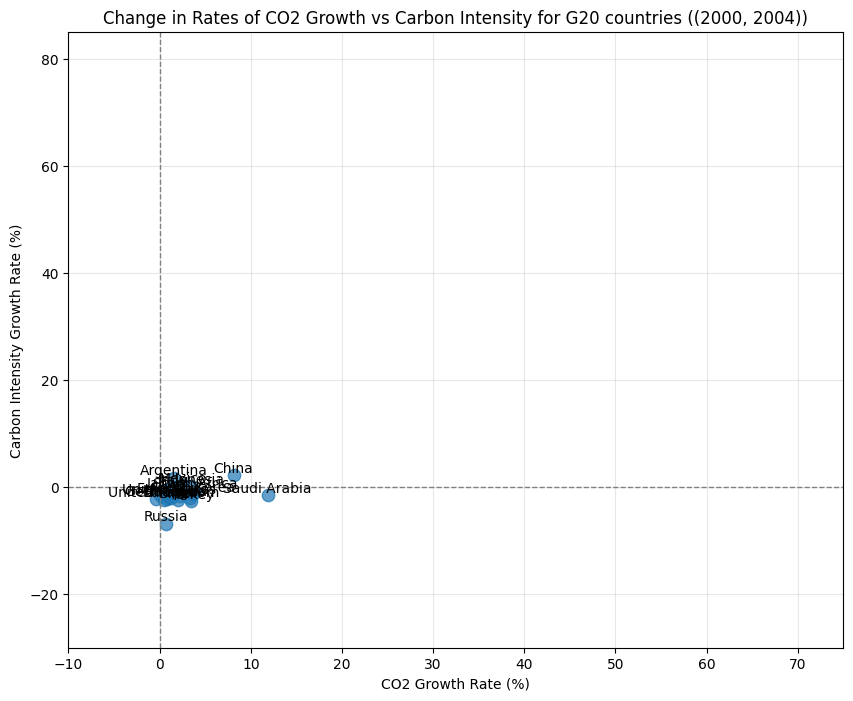

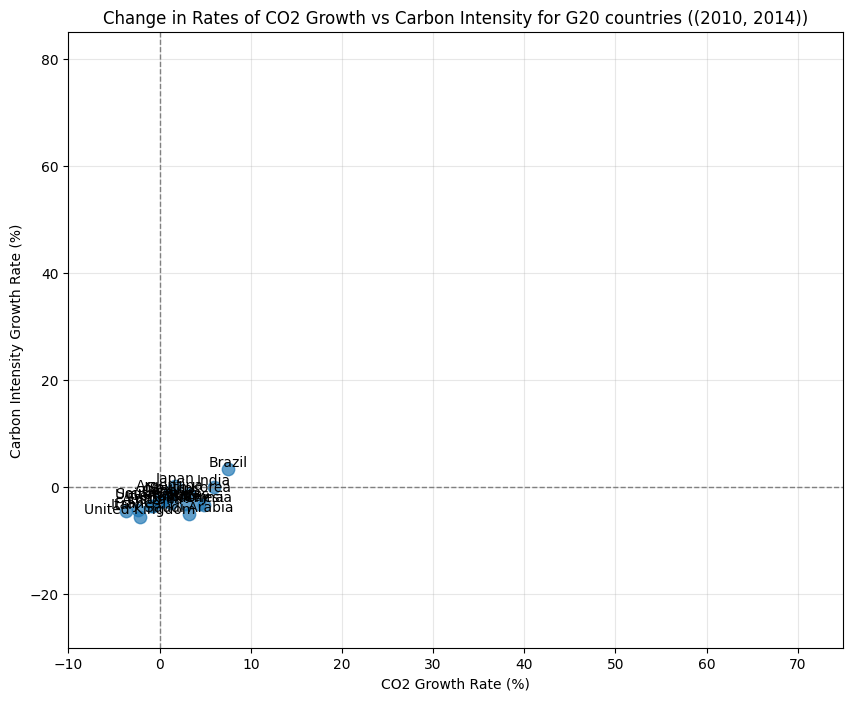

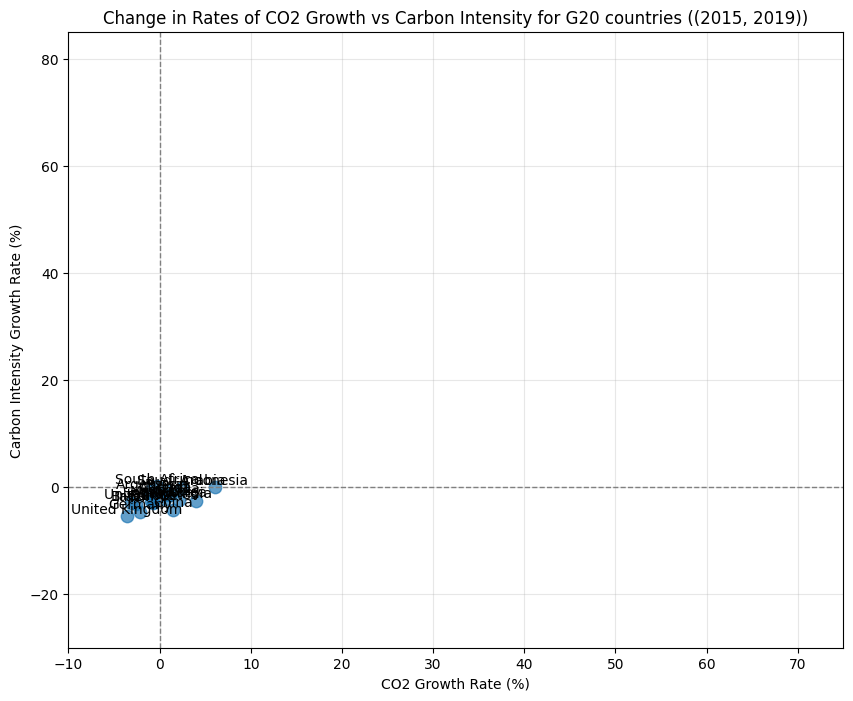

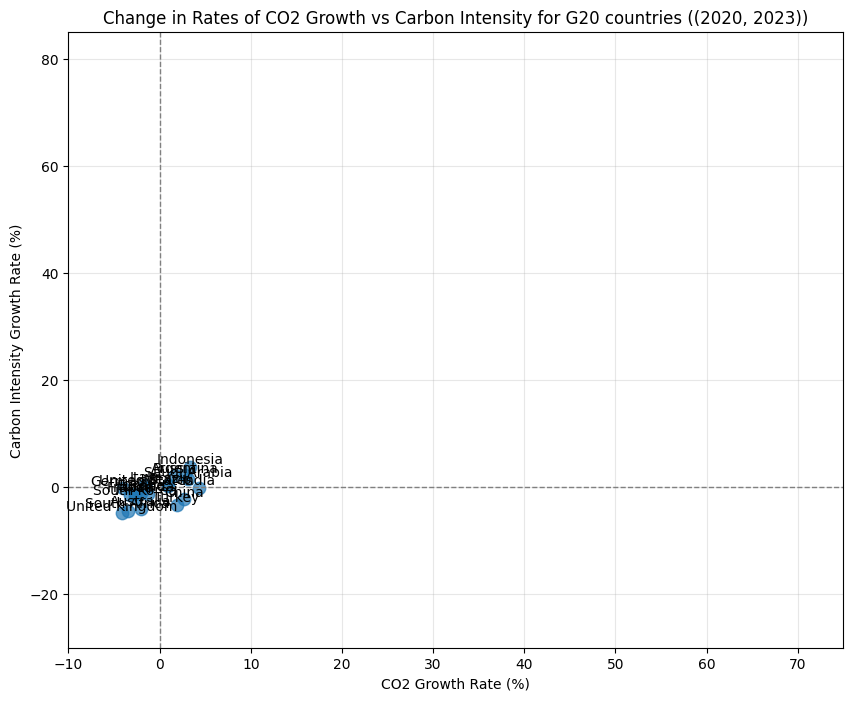

In [ ]:
# directory
#save_dir = 'co2_ci_comparion_plots'

for period in periods:
    if isinstance(period, tuple):
        period_str = f"{period[0]}-{period[1]}"
    else:
        period_str = period

    period_df = results_df[results_df['period'] == period_str]

    plt.figure(figsize=(10, 8))

    plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    plt.scatter(period_df['co2_growth_rate'],
                period_df['carbon_intensity_rate'],
                s=80, alpha=0.7)
    
    for _, row in period_df.iterrows():
        plt.annotate(row['country'],
                     (row['co2_growth_rate'], row['carbon_intensity_rate']),
                     fontsize=10, ha='center', va='bottom')
    
    plt.xlim(-10, 75)
    plt.ylim(-30, 85)

    plt.grid(True, alpha=0.3)

    plt.title(f'Change in Rates of CO2 Growth vs Carbon Intensity for G20 countries ({period})')
    plt.xlabel('CO2 Growth Rate (%)')
    plt.ylabel('Carbon Intensity Growth Rate (%)')

    #plt.savefig(f'CAGR_Growth_Intensity_G20_({period}).png')

    plt.show()
    plt.close()

### Energy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

g20_countries = [
    'United States', 'China', 'Japan', 'Germany', 
    'United Kingdom', 'France', 'Italy', 'Canada',
    'Brazil', 'Russia', 'India', 'Australia', 
    'Mexico', 'Indonesia', 'Turkey', 'Saudi Arabia',
    'South Africa', 'Argentina', 'South Korea', 'Europe'
]

df_energy = pd.read_csv("https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv")

df_energy.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

### Porportion of types of energy in the latest year

In [ ]:
g20_in_dataset = [country for country in g20_countries if country in df_energy['country'].unique()]
missing_g20 = [country for country in g20_countries if country not in df_energy['country'].unique()]

print(f"G20 countries found in the dataset: {len(g20_in_dataset)} out of {len(g20_countries)}")
if missing_g20:
    print(f"Missing G20 countries: {missing_g20}")


energy_g20 = df_energy[df_energy['country'].isin(g20_countries)].copy()

latest_years = energy_g20.sort_values('year', ascending=False)['year'].unique()[:5]
for year in latest_years:
    countries_with_data = energy_g20[energy_g20['year'] == year]['country'].nunique()
    print(f"Year {year}: {countries_with_data}/{len(g20_in_dataset)} G20 countries with data")
    
latest_year = latest_years[0]
print(f"\nUsing {latest_year} as the latest year for analysis")

carbon_sources = [
    'coal_consumption',
    'oil_consumption',
    'gas_consumption'
]

noncarbon_sources = [
    'hydro_consumption',
    'nuclear_consumption',
    'solar_consumption',
    'wind_consumption',
    'biofuel_consumption',
    'other_renewable_consumption'
]

for col in carbon_sources + noncarbon_sources:
    if col in energy_g20.columns:
        non_null_count = energy_g20[energy_g20['year'] == latest_year][col].notna().sum()
        print(f"  {col}: {non_null_count} out of {len(g20_in_dataset)} countries with data in {latest_year}")
    else:
        print(f"  {col}: Not in the dataset")

# Data for the latest year
latest_data = energy_g20[energy_g20['year'] == latest_year].copy()

# Overall energy consumption
if 'primary_energy_consumption' in latest_data.columns:
    top5_energy = latest_data.sort_values('primary_energy_consumption', ascending=False).head(5)
    print("\nTop 5 G20 countries by total energy consumption (TWh):")
    for _, row in top5_energy.iterrows():
        print(f"  {row['country']}: {row['primary_energy_consumption']:,.0f} TWh")

G20 countries found in the dataset: 20 out of 20
Year 2023: 19/20 G20 countries with data
Year 2022: 20/20 G20 countries with data
Year 2021: 20/20 G20 countries with data
Year 2020: 20/20 G20 countries with data
Year 2019: 20/20 G20 countries with data

Using 2023 as the latest year for analysis
  coal_consumption: 19 out of 20 countries with data in 2023
  oil_consumption: 19 out of 20 countries with data in 2023
  gas_consumption: 19 out of 20 countries with data in 2023
  hydro_consumption: 19 out of 20 countries with data in 2023
  nuclear_consumption: 19 out of 20 countries with data in 2023
  solar_consumption: 19 out of 20 countries with data in 2023
  wind_consumption: 19 out of 20 countries with data in 2023
  biofuel_consumption: 19 out of 20 countries with data in 2023
  other_renewable_consumption: 19 out of 20 countries with data in 2023

Top 5 G20 countries by total energy consumption (TWh):
  China: 47,428 TWh
  Europe: 28,667 TWh
  United States: 26,189 TWh
  India: 10

In [ ]:
#latest_data = energy_g20[energy_g20['year'] == '2022'].copy()
#latest_year = '2022'
latest_g20 = energy_g20[energy_g20['year'] == latest_year].copy()

available_carbon_sources = [col for col in carbon_sources if col in latest_g20.columns]
available_noncarbon_sources = [col for col in noncarbon_sources if col in latest_g20.columns]

for col in available_carbon_sources + available_noncarbon_sources:
    latest_g20[col] = latest_g20[col].fillna(0)

latest_g20['total_carbon_energy'] = latest_g20[available_carbon_sources].sum(axis=1)
latest_g20['total_noncarbon_energy'] = latest_g20[available_noncarbon_sources].sum(axis=1)
latest_g20['total_energy'] = latest_g20['total_carbon_energy'] + latest_g20['total_noncarbon_energy']

latest_g20 = latest_g20.sort_values('total_energy', ascending=False)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.figure(figsize=(16, 10))

colors = {
    'coal_consumption': '#2C3E50',      # Dark blue-gray
    'oil_consumption': '#E74C3C',       # Red
    'gas_consumption': '#F39C12',       # Orange
    'hydro_consumption': '#3498DB',     # Blue
    'nuclear_consumption': '#9B59B6',   # Purple
    'solar_consumption': '#F1C40F',     # Yellow
    'wind_consumption': '#1ABC9C',      # Turquoise
    'biofuel_consumption': '#2ECC71',   # Green
    'other_renewable_consumption': '#7F8C8D'    # Gray
}

bottom_values = np.zeros(len(latest_g20))
legend_handles = []

# CO2 generating sources
for source in available_carbon_sources:
    source_name = source.replace('_consumption', '').title()
    bars = plt.bar(latest_g20['country'], latest_g20[source], 
             bottom=bottom_values, color=colors.get(source, '#333333'),
             label=source_name)
    legend_handles.append(bars)
    bottom_values += latest_g20[source].values

# Non-Carbon sources
for source in available_noncarbon_sources:
    source_name = source.replace('_consumption', '').title()
    bars = plt.bar(latest_g20['country'], latest_g20[source], 
             bottom=bottom_values, color=colors.get(source, '#999999'),
             label=source_name)
    legend_handles.append(bars)
    bottom_values += latest_g20[source].values

# Options
plt.title(f'Energy Mix for G20 Countries ({latest_year})')
plt.xlabel('Country')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))

#plt.savefig('Energymix_g20_2023.png')
plt.tight_layout()
plt.show()

### Carbon vs Renewable energy latest year

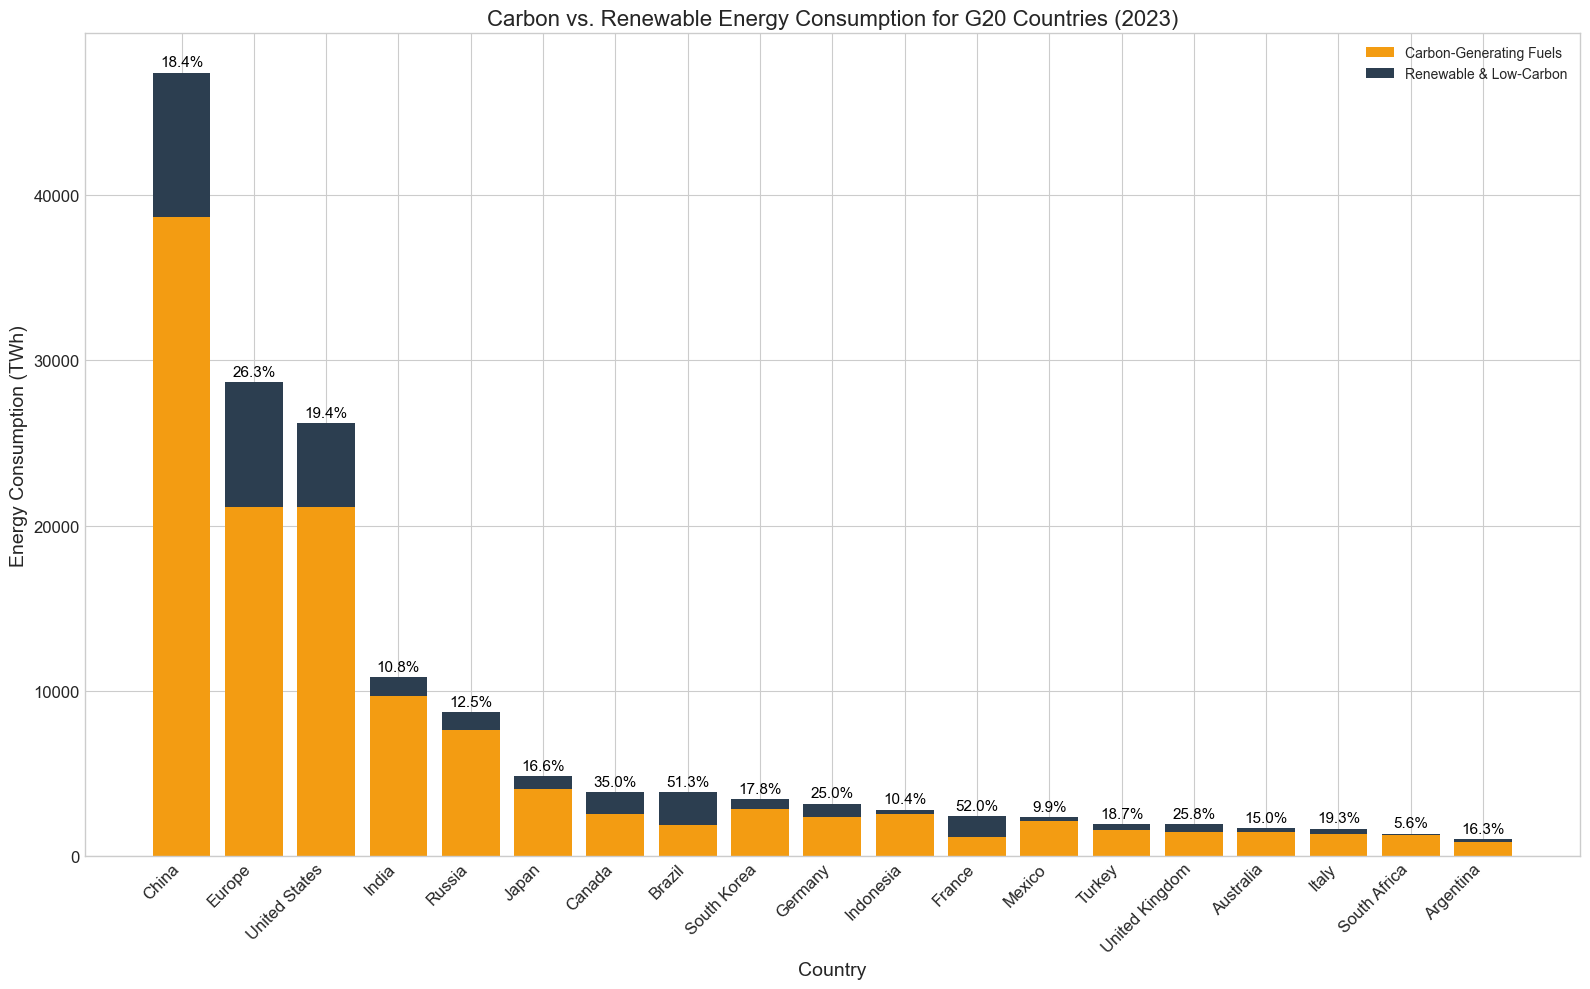

In [ ]:
# Figure
plt.figure(figsize=(16, 10))

# Carbon energy
carbon_bars = plt.bar(latest_g20['country'], latest_g20['total_carbon_energy'], 
                     color='#F39C12', label='Carbon-Generating Fuels')

# Noncarbon energy
renewable_bars = plt.bar(latest_g20['country'], latest_g20['total_noncarbon_energy'], 
                        bottom=latest_g20['total_carbon_energy'], 
                        color='#2C3E50', label='Renewable & Low-Carbon')

# Percentage label for renewable energy
for i, country in enumerate(latest_g20['country']):
    total = latest_g20['total_energy'].iloc[i]
    renewable = latest_g20['total_noncarbon_energy'].iloc[i]
    if total > 0:
        renewable_pct = (renewable / total) * 100
        plt.text(i, total + 200, f"{renewable_pct:.1f}%", 
                ha='center', va='bottom', fontsize=11, 
                color='black')

# Options
plt.title(f'Carbon vs. Non-carbon Generating Source Consumption for G20 Countries ({latest_year})')
plt.xlabel('Country')
plt.ylabel('Energy Consumption (TWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')

#plt.savefig('Carbon_nonCarbon_consumption_G20_2023.png')
plt.tight_layout()
plt.show()

### Energy Mix over time

['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil', 'Russia', 'India', 'Australia', 'Mexico', 'Indonesia', 'Turkey', 'Saudi Arabia', 'South Africa', 'Argentina', 'South Korea', 'Europe'] have enough data


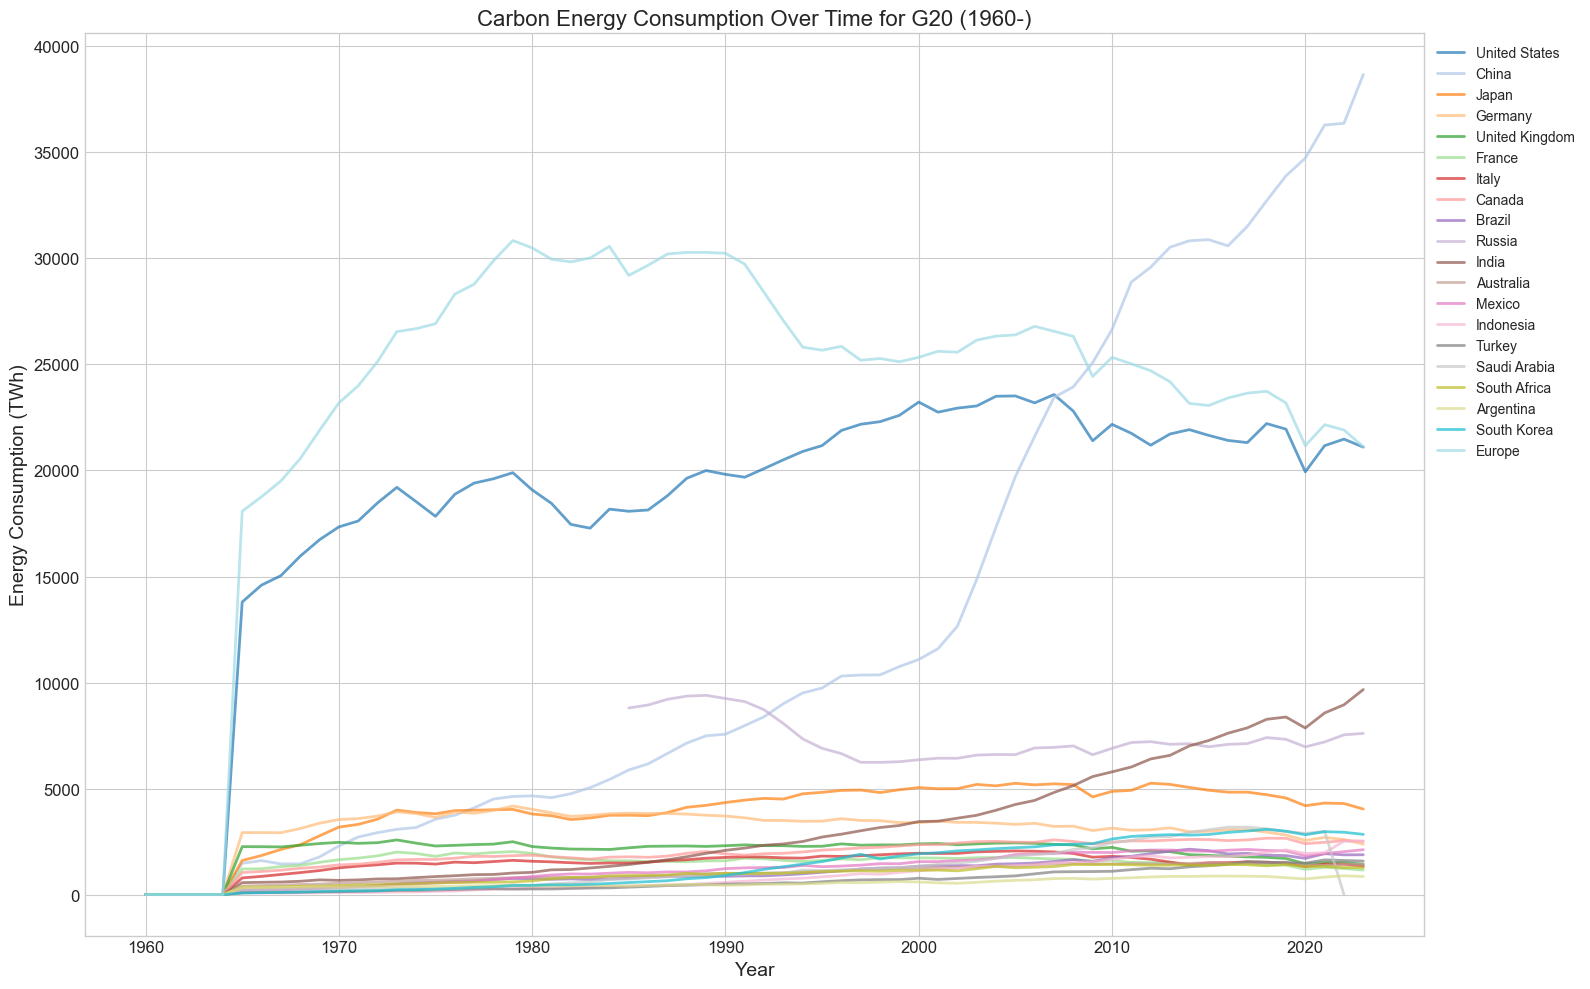

In [ ]:
# Carbon generating energy over time for g20 countries
plt.figure(figsize=(16, 10))

color_map = plt.cm.get_cmap('tab20', len(g20_countries))
country_colors = {country: color_map(i) for i, country in enumerate(g20_countries)}

min_years_required = 10

countries_with_history = []
for country in g20_in_dataset:
    country_data = energy_g20[energy_g20['country'] == country]
    if len(country_data) >= min_years_required:
        carbon_data_exists = any(col in energy_g20.columns for col in carbon_sources)
        renewable_data_exists = any(col in energy_g20.columns for col in noncarbon_sources)
        if carbon_data_exists and renewable_data_exists:
            countries_with_history.append(country)

print(f"{countries_with_history} have enough data")

for country in countries_with_history:
    country_data = energy_g20[(energy_g20['country'] == country)].copy()
    
    country_data['total_carbon_energy'] = country_data[available_carbon_sources].sum(axis=1, skipna=True)
    country_data['total_noncarbon_energy'] = country_data[available_noncarbon_sources].sum(axis=1, skipna=True)
    
    energy_g20.loc[energy_g20['country'] == country, 'total_carbon_energy'] = country_data['total_carbon_energy'].values
    energy_g20.loc[energy_g20['country'] == country, 'total_noncarbon_energy'] = country_data['total_noncarbon_energy'].values

for country in countries_with_history:
    country_data = energy_g20[(energy_g20['country'] == country) & (energy_g20['year'] >= 1960)].sort_values('year')
    plt.plot(country_data['year'], country_data['total_carbon_energy'], 
            label=country, color=country_colors.get(country, 'gray'), linewidth=2, alpha=0.7)

# Options
plt.title('Carbon Energy Consumption Over Time for G20 (1960-)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#plt.savefig('Carbon_G20_1960.png')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))

for country in countries_with_history:
    country_data = energy_g20[(energy_g20['country'] == country) & (energy_g20['year'] >= 1960)].sort_values('year')
    plt.plot(country_data['year'], country_data['total_noncarbon_energy'], 
            label=country, color=country_colors.get(country, 'gray'), linewidth=2, alpha=0.7)

# Options
plt.title('Non-carbon Generating Energy Consumption Over Time for G20 (1960-)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#plt.savefig('Noncarbon_G20_1960.png')
plt.tight_layout()
plt.show()

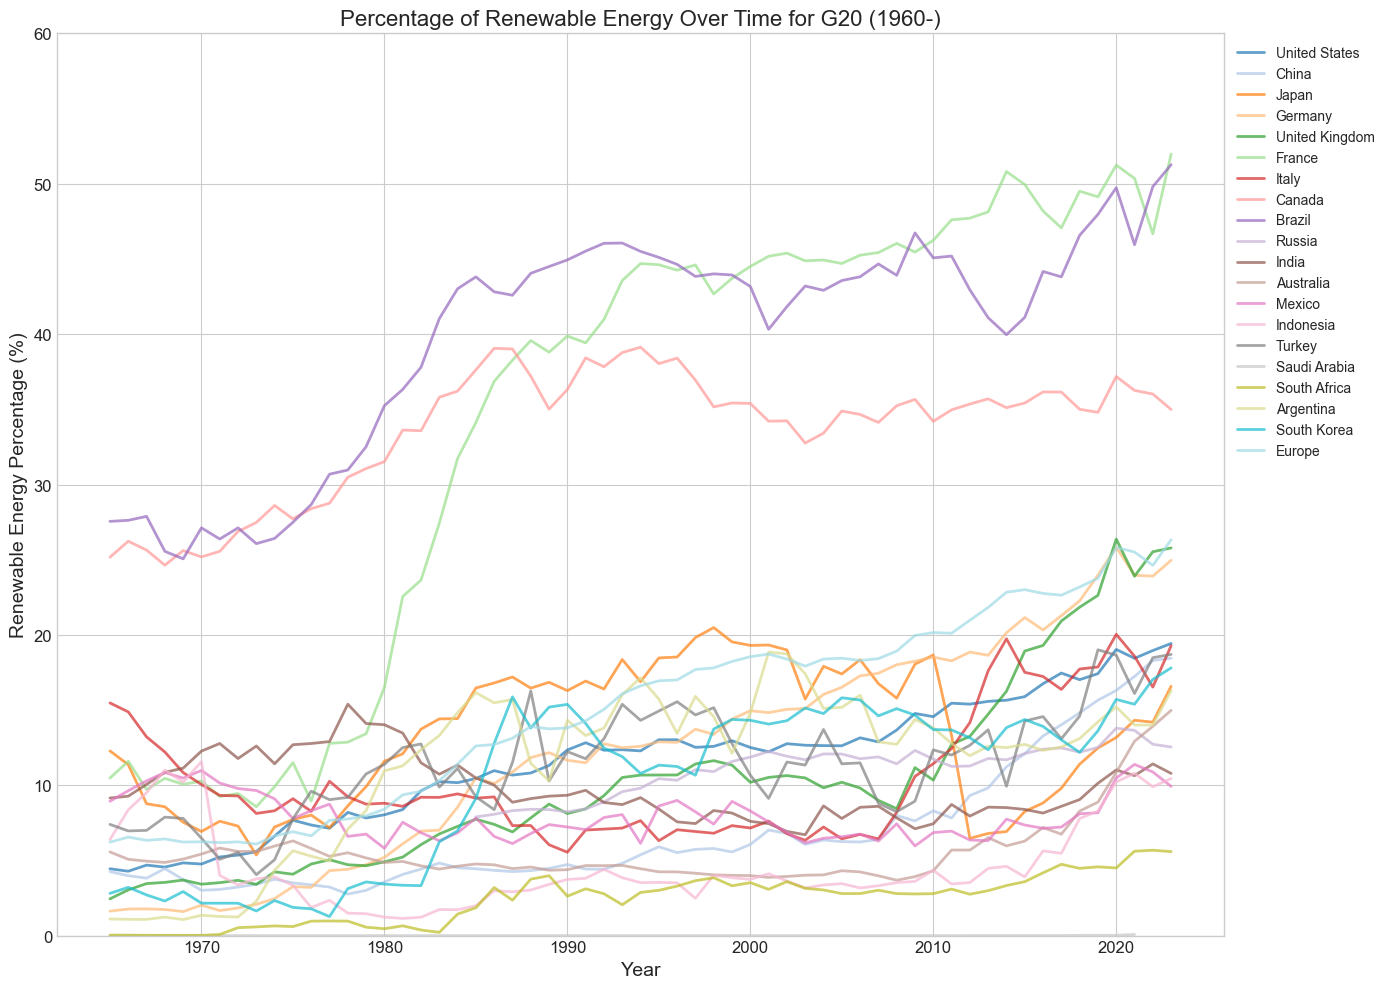

In [ ]:
for country in countries_with_history:
    country_data = energy_g20[(energy_g20['country'] == country) & (energy_g20['year'] >= 1960)].sort_values('year')

    total_energy = country_data['total_carbon_energy'] + country_data['total_noncarbon_energy']
    noncarbon_pct = (country_data['total_noncarbon_energy'] / total_energy) * 100
    
    valid_data = pd.DataFrame({'year': country_data['year'], 'noncarbon_pct': noncarbon_pct})
    valid_data = valid_data.dropna()
    
    plt.plot(valid_data['year'], valid_data['noncarbon_pct'], 
            label=country, color=country_colors.get(country, 'gray'), linewidth=2, alpha=0.7)

# Options
plt.title('Percentage of Non-carbon Generating Energy Over Time for G20 (1960-)')
plt.xlabel('Year')
plt.ylabel('Non-carbon Generating Energy Consumption (%)')
plt.ylim(0, 60)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.savefig('Percentage_Noncarbon_G20_1960.png')
plt.tight_layout()
plt.show()

### Feature Selection -- holdit

In [34]:
common_columns = set(df_co2.columns).intersection(set(df_energy.columns))
print(common_columns)

{'energy_per_gdp', 'gdp', 'energy_per_capita', 'primary_energy_consumption', 'year', 'iso_code', 'population', 'country'}


In [29]:
df = pd.merge(
    df_co2,
    df_energy,
    on=list(common_columns),
    how='left'
)

In [30]:
df.shape

(50191, 201)

In [31]:
cols = [col for col in df.columns if 'co2' in col]
print(cols)

['cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2', 'share_global_cement_co2', 'share_global_co2', 'share_global_co2_including_luc', 'share_global_coal_co2', 'share_global_cumulative_cement_co2

In [32]:
cols = [col for col in df_co2.columns if 'co2' in col.lower()]
print(cols)

['cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2', 'share_global_cement_co2', 'share_global_co2', 'share_global_co2_including_luc', 'share_global_coal_co2', 'share_global_cumulative_cement_co2

In [33]:
cols = [col for col in df.columns if 'energy' in col.lower()]
print(cols)

['co2_including_luc_per_unit_energy', 'co2_per_unit_energy', 'energy_per_capita', 'energy_per_gdp', 'primary_energy_consumption', 'biofuel_share_energy', 'coal_share_energy', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'fossil_energy_per_capita', 'fossil_share_energy', 'gas_energy_per_capita', 'gas_share_energy', 'hydro_energy_per_capita', 'hydro_share_energy', 'low_carbon_energy_per_capita', 'low_carbon_share_energy', 'nuclear_energy_per_capita', 'nuclear_share_energy', 'oil_energy_per_capita', 'oil_share_energy', 'other_renewables_energy_per_capita', 'other_renewables_share_energy', 'renewables_energy_per_capita', 'renewables_share_energy', 'solar_energy_per_capita', 'solar_share_energy', 'wind_energy_per_capita', 'wind_share_energy']
